# Машинное обучение, ВМК МГУ

# Практическое задание 3

### Общая информация

Дата выдачи: 2 ноября 2020

Мягкий дедлайн: 01:00MSK 16 ноября 2020 (за каждый день просрочки снимается 1 балл, отсчет дней ведите от 01:00 2 ноября)

Жесткий дедлайн: 01:00MSK 23 ноября 2020.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-3-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-3-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка:** 9.5

**Напоминание:**

* Все ваши графики должны быть **"красивыми"** --- подробнее о том, как их оформлять, можно найти в первом практическом задании. При несоответствии какиму-то из критериев вам могут снять баллы.
* Пишите в текстовых ячейках/print в коде ответы на **все вопросы из заданий/просьбы сделать выводы** --- при их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и поэтому будем снижать баллы

In [3]:
%pylab inline
import pandas as pd

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split, cross_val_predict

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов (веса, они же составляют вектор w) близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа **ненулевых коэффициентов от коэффицента регуляризации** (перебирайте значения по _логарифмической сетке_ от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

**Замечания:**
* Используйте модели из sklearn
* Можно строить графики с учетом $w_0$ (bias), можно без **(обязательно поясните, как в итоге строили),**  однако стоит учитывать, что $w_0 \approx 0$ несет другой смысл, нежели чем $w_i \approx 0$.
* Перебор по логарифмической сетке от $10^{-3}$ до $10^{3}$ подразумевает **равномерный перебор по степеням:** $10^{-3}, 10^{-2}, 10^{-1}, 10^{0}$ итд. Однако ничего не мешает (и не будет лишним) сделать и более частую равномерную сетку, если позволяет время вычислений. Менее частую сетку лучше делать в тех случаях, когда вычисления совсем запредельные по времени, однако помните, что делание выводов о какой-либо зависимости по 3-4 точкам может привести к ошибочным результатам **(и такое будет засчитываться как ошибка, если не пояснено, почему нельзя было сделать больше точек)**

In [44]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_auc_score, roc_curve, auc, \
    precision_recall_curve, average_precision_score, precision_score, recall_score, confusion_matrix

In [4]:
l1 = []
l2 = []
l_coefs = np.logspace(-3, 3,100)
for l in l_coefs:
    l2.append(np.sum(np.abs(Ridge(l).fit(X_train, y_train).coef_) < 0.001))
    l1.append(np.sum(np.abs(Lasso(l).fit(X_train, y_train).coef_) < 0.001))

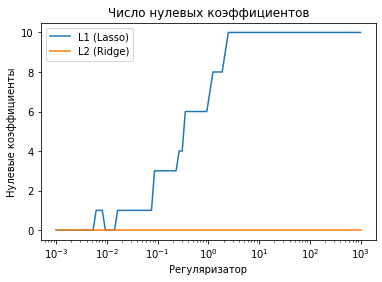

In [5]:
plt.plot(l_coefs, l1, label="L1 (Lasso)")
plt.plot(l_coefs, l2, label="L2 (Ridge)")
plt.xscale("log")
plt.xlabel("Регуляризатор")
plt.ylabel("Нулевые коэффициенты")
plt.legend()
plt.title("Число нулевых коэффициентов")
plt.show()

Да, я ожидал именно такой результат. Когда мы увеличиваем alpha, мы увеличиваем штраф. Таким образом Лассо обнуляет значения
весов, тем самым полностью убирая признак из датасета.

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [6]:
y_pred = Ridge().fit(X_train, y_train).predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

RMSE: 58.304415127748044
MAE: 49.602846072752996
R^2: 0.3598993868368464


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

**Замечание:** функцию потерь на выборке (X, y) можно, например, посчитать вручную, вытащив коэффициенты из модели (обычно это атрибут coef_) и учитывая коэффициент регуляризации $\alpha$.

In [7]:
cv = KFold(n_splits=5, shuffle=True)
gs = GridSearchCV(Ridge(), {'alpha': l_coefs}, cv=cv, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print("Best alpha:", gs.best_params_["alpha"])

Best alpha: 0.07564633275546291


In [8]:
y_pred = gs.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

RMSE: 55.6413039572501
MAE: 47.26451965183522
R^2: 0.41703839094373785


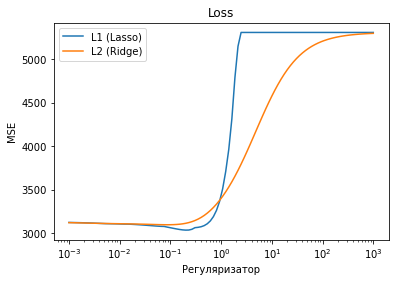

In [9]:
l1 = []
l2 = []
for l in l_coefs:
    l1.append(mean_squared_error(y_test, Lasso(l).fit(X_train, y_train).predict(X_test)))
    l2.append(mean_squared_error(y_test, Ridge(l).fit(X_train, y_train).predict(X_test)))

plt.plot(l_coefs, l1, label="L1 (Lasso)")
plt.plot(l_coefs, l2, label="L2 (Ridge)")
plt.xscale("log")
plt.xlabel("Регуляризатор")
plt.ylabel("MSE")
plt.legend()
plt.title("Loss")
plt.show()

Качество предсказаний немного увеличилось, однако показатель
R^2 все-равно низкий.

__Задание 2.__ Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

Text(0.5, 1.0, 'Histogram of errors')

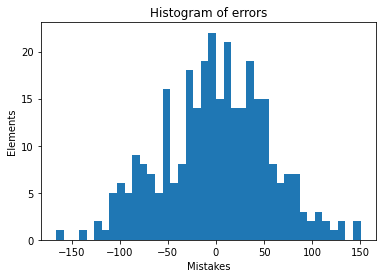

In [10]:
y_pred = cross_val_predict(gs, X_train, y_train)
mistakes = y_pred - y_train
plt.hist(mistakes, bins = 40)
plt.xlabel('Mistakes')
plt.ylabel('Elements')
plt.title('Histogram of errors')

Есть выбросы, но их не очень много, в целом наблюдается нормальное распределение.

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной (или, называемой валидационной) (X_test, y_test) выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

Text(0.5, 1.0, 'Histogram of errors')

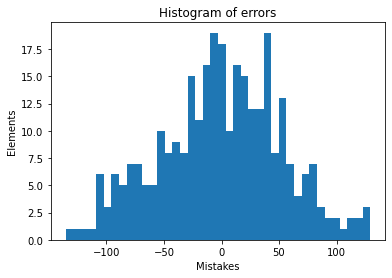

In [11]:
ind_to_del = np.where(abs(mistakes) > 140)[0]
X_train_new = pd.DataFrame(X_train).drop(ind_to_del)
y_train_new = np.delete(y_train, ind_to_del)
mistakes_new = cross_val_predict(Ridge(alpha=0.0572), X_train_new, y_train_new) - y_train_new
plt.hist(mistakes_new, bins = 40)
plt.xlabel('Mistakes')
plt.ylabel('Elements')
plt.title('Histogram of errors')

In [12]:
parameters = {'alpha' : l_coefs}
regr = Ridge()
regr_gs = GridSearchCV(regr, parameters, scoring='neg_mean_squared_error', cv = 10)
regr_gs.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [13]:
y_pred = regr_gs.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

RMSE: 55.92977291647289
MAE: 47.00567152301353
R^2: 0.41097806378761037


**Ответ: Лучше не стало, это логично, выбросы на отложенной выборке mse штрафует высоко.


## Часть 2. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [37]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [16]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train)

d:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

ROC-AUC

In [23]:
y_pred = svm.predict(X_test)
score = svm.decision_function(X_test)

ROC-AUC =  0.8497674758410448


Text(0, 0.5, 'True Positive Rate')

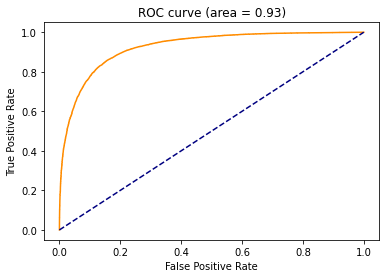

In [24]:
fpr, tpr, _ = roc_curve(y_test, score)
roc_auc_Lr = auc(fpr, tpr)
plt.plot(fpr,tpr, color='darkorange', label='SVM')
plt.title(u'ROC curve (area = %0.2f)' % roc_auc_Lr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

PR-AUC

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.92')

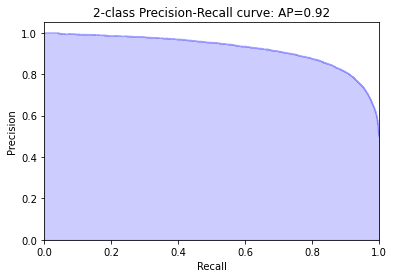

In [27]:
y_score = svm.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
color='b')

average_precision = average_precision_score(y_test, y_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**
* Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.
* **Обязательно пишите легенду,** поясняющую что изображено на полотне.

In [30]:
from sklearn.datasets import make_classification
X_gen, y_gen = make_classification(n_features=2,n_samples=500, n_redundant=0,random_state=228)
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_gen, y_gen)

SVC(kernel='linear')

In [31]:
vectors = svc.support_vectors_
coef = svc.coef_
support = svc.support_

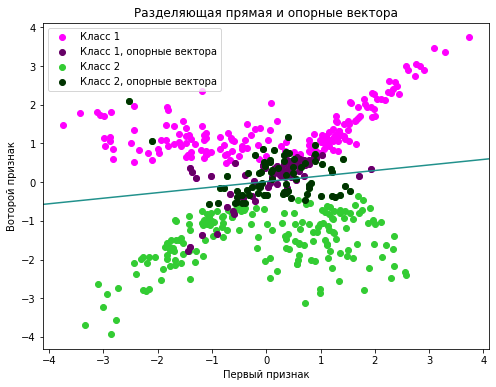

In [32]:
mask = y_gen == 1
plt.figure(figsize=(8,6))
plt.scatter(X_gen[mask][:,0], X_gen[mask][:, 1], c='#FF00FF', label='Класс 1')
mask = np.logical_not(mask)
plt.scatter(X_gen[mask][:, 0], X_gen[mask][:, 1], c='#33CC33', label='Класс 2')
X_sup = X_gen[support]
y_sup = y_gen[support]
mask = y_sup == 1
plt.scatter(X_sup[mask][:, 0], X_sup[mask][:, 1], c='#660066', label='Класс 1, опорные вектора')
mask = np.logical_not(mask)
plt.scatter(X_sup[mask][:, 0], X_sup[mask][:, 1], c='#003300', label='Класс 2, опорные вектора')
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,2,1,3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = svc.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, levels=0)
plt.ylabel('Воторой признак')
plt.xlabel('Первый признак')
plt.title('Разделяющая прямая и опорные вектора')
plt.savefig('gg.pdf')

Видно, что многие опорные вектора попали в чужую область,объясняется тем, что выборка была сгенерирована случайно,
и так вышло, что она неразделима линейно. Алгоритм будет ошибаться на условной границе.

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых.

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [43]:
def plot_calibration_curve(y_test, preds, label):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2) # минус заменил на плюс
        count_catch = np.count_nonzero([(preds >= l) & (preds < r)])
        count_catch = count_catch if count_catch!=0 else 1
        bin_real_ratios.append(np.count_nonzero(y_test[(preds >= l) & (preds < r)] == 1) /
                               count_catch ) # добавил деление на количество всех объектов
    plt.plot(bin_middle_points, bin_real_ratios, label=label)

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [40]:
lr = LogisticRegression(C=0.01)
lr.fit(X_train, y_train)
y_proba_lr = lr.predict_proba(X_test)

svm = LinearSVC(C = 0.01)
svm.fit(X_train, y_train)
y_proba_svm = svm.decision_function(X_test)

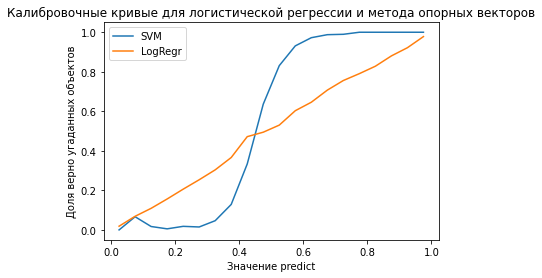

In [45]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
y_proba_svm_minmax = minmax.fit_transform(y_proba_svm[:, np.newaxis])

plot_calibration_curve(y_test, y_proba_svm_minmax[:, 0], label='SVM')

plot_calibration_curve(y_test, y_proba_lr[:, 1], label='LogRegr')
plt.title('Калибровочные кривые для логистической регрессии и метода опорных векторов')
plt.xlabel('Значение predict')
plt.ylabel('Доля верно угаданных объектов')
plt.legend()

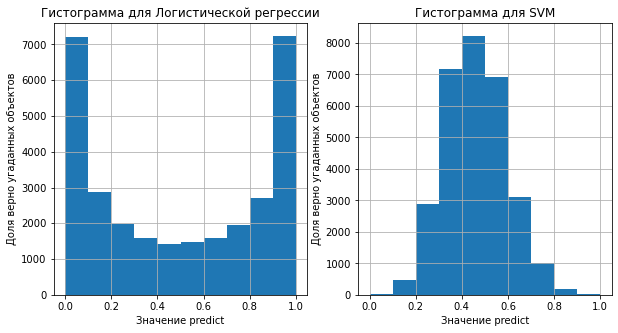

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(y_proba_lr[:, 1])
ax1.set_xlabel('Значение predict')
ax1.set_ylabel('Доля верно угаданных объектов')
ax1.set_title('Гистограмма для Логистической регрессии')
ax2.hist(y_proba_svm_minmax)
ax1.grid(True)
ax2.set_xlabel('Значение predict')
ax2.set_ylabel('Доля верно угаданных объектов')
ax2.set_title('Гистограмма для SVM')
ax2.grid(True)

График с калибровачными прямыми показывает, что LogReg корректно предсказывает вероятности классов.
В том же время SVM значительно занижают близкие к нулю и завышаю близкие к 1 вероятности.

На гистограммах четко видно, что метод опорных векторов большинству объектам дает вероятности в диапазоне 0.4-0.6,
что говорит о том, что данные размещенны близко к разделяющей прямой SVM.


LogReg в свою очередь четко относит объекты по классам 0,1, а остальные вероятности плавно убывают к центру. Такое распределение
вероятно и соответвует реальному распределению вероятностей в выборке.

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

Text(0.5, 1.0, 'Калибровочная прямая для SVM')

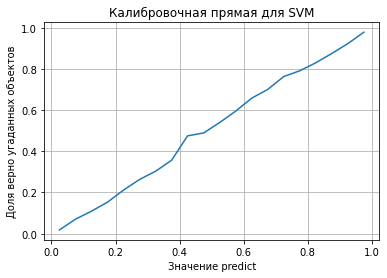

In [51]:
from sklearn.calibration import CalibratedClassifierCV

c_cl = CalibratedClassifierCV(svm, method='sigmoid')
c_cl.fit(X_train, y_train)
y_proba_svm_c = c_cl.predict_proba(X_test)
plot_calibration_curve(y_test, y_proba_svm_c[:, 1],None)
plt.grid(True)
plt.xlabel('Значение predict')
plt.ylabel('Доля верно угаданных объектов')
plt.title('Калибровочная прямая для SVM')

Калибровочная прямая заметно улучшилась и стала близкой с Logreg.

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

## Часть 3. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(0.5 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [16]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

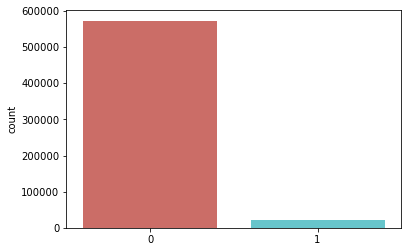

In [5]:
import seaborn as sns
sns.countplot(x=target, palette='hls')
plt.show()

In [10]:
count_1 = len(target[target==1])
pct_of_1 = count_1/len(target)
print("процент первого исхода", pct_of_1*100, "%")

процент первого исхода 3.6447517859182947 %


очень высокий дисбаланс в классах, применим сэмплинг

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [17]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [17]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict_proba(X_test)

d:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

ROC-AUC

Text(0, 0.5, 'True Positive Rate')

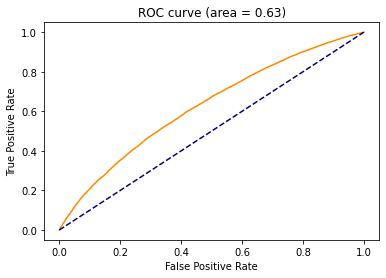

In [19]:
fpr, tpr, _ = roc_curve(y_test, y_pred_log[:,1])
roc_auc_Lr = auc(fpr, tpr)
plt.plot(fpr,tpr, color='darkorange')
plt.title(u'ROC curve (area = %0.2f)' % roc_auc_Lr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

PR-AUC

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.61')

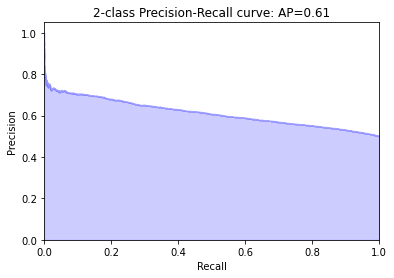

In [21]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_log[:, 1])

plt.step(recall, precision, color='b', alpha=0.2,
where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
color='b')

average_precision = average_precision_score(y_test, y_pred_log[:,1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

**Ответ: Можно заметитить, что ROC-AUC ~= PR-AUC, на этом достаточно оснований чтобы сделать вывод:
- модель определяет метку положительного класса с такой же точностью, как и метку положительного и отрицательного классов.
К такому результату привел сэмпилнг.
- Ошибка 1 рода такая же, как и ошибка второго рода.

__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1 балл)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

Замечание:
* Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне **обязательно с легендой;** если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним  и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)
* $\alpha$ желательно перебирать по **логарифмической шкале** (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

In [17]:
l_coefs = np.logspace(-3, 3,100)
with_history = {}
for alpha in l_coefs:
    sgd = SGDClassifier(loss='log',alpha=alpha, warm_start=True)
    with_history[alpha] = sgd.partial_fit(X_train, y_train, classes=np.unique(y_train)).coef_

In [21]:
import scipy.sparse
from scipy.spatial.distance import euclidean
def func(X, y, w, l2_coef):
    X = scipy.sparse.csr_matrix(X)
    a = np.logaddexp(0, -y * np.dot(X, w))
    score = (1 / X.shape[0]) * np.sum(a, axis=0) + l2_coef * np.sum(w ** 2) / 2
    return score

In [22]:

plt.plot(l_coefs, func(X=X_train, y=y_train, w=with_history[alpha].T, l2_coef=0.0001))
plt.title("Log Reg Loss")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

MemoryError: Unable to allocate 151. MiB for an array with shape (19798997,) and data type float64

57

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [44]:
import time

start = time.time()
lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred[:,1]))
print('time without ohe:', time.time() - start)

0.6211365529107695
time without ohe: 3.305162191390991


d:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [5]:
from sklearn.preprocessing import OneHotEncoder
# категориальные признаки
names_list = X_train.columns.values.tolist()
ind_list = []
for name in names_list:
    if name.endswith('cat'):
        ind_list.append(name)

In [42]:
X_train_ohe = X_train.copy()
X_test_ohe = X_test.copy()
for ind in ind_list:
    one_hot_train = pd.get_dummies(X_train[ind])
    one_hot_test = pd.get_dummies(X_test[ind])
    final_train, final_test = one_hot_train.align(one_hot_test, join='left', axis=1, fill_value=0)
    X_train_ohe = X_train_ohe.drop(ind, axis=1)
    X_train_ohe = pd.concat([X_train_ohe, one_hot_train], axis=1)
    X_test_ohe = X_test_ohe.drop(ind, axis=1)
    X_test_ohe = pd.concat([X_test_ohe, one_hot_test], axis=1)

In [45]:
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_ohe, y_train)
stop = time.time()
print('time with ohe:', stop - start)
y_pred = lr.predict_proba(X_test_ohe)
print(roc_auc_score(y_test, y_pred[:, 1]))

time with ohe: 5.845367431640625
0.6295845162816045


d:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Время работы увеличилось почти в 3 раза, однако точность увеличилась всего примерно на 0.09, что
делает вопрос о целесообразности данного подхода к данному датасету.

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки.

__(Бонусная часть)__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 балл)__

In [18]:
X_train_counts = X_train.copy()
X_test_counts = X_test.copy()

for ind in ind_list:
    cat_list = np.unique(X_train[ind])
    counts_train = np.zeros(np.size(X_train[ind]))
    counts_test = np.zeros(np.size(X_test[ind]))
    for cat in cat_list:
        cat_val = np.sum(np.equal(X_train[ind], cat) & y_train == 1) / np.sum(np.equal(X_train[ind], cat))
        counts_train[X_train[ind] == cat] = cat_val
        counts_test[X_test[ind] == cat] = cat_val
    X_train_counts.loc[:, ind] = counts_train
    X_test_counts.loc[:, ind] = counts_test

In [8]:
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_counts, y_train)
stop = time.time()
print('time without noise:', stop - start)
y_proba = lr.predict_proba(X_test_counts)
print("AUC ROC without noise", roc_auc_score(y_test, y_proba[:, 1]))

time without noise: 3.863438129425049
AUC ROC without noise 0.6248767981982258


d:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Ответ:
Благодаря тому, что количество признаков значительно уменьшилось, время работы тоже уменьшилось,
качество на тестовой выборке стало немного лучше, чем на исходных данных, но хуже, чем при использовании one-hot кодирования.

Также отметим, что мы не нормировали данные, а счетчики принимают очень близкие значения к 0.5.
Получается, что все данные не нормированы, а счетчики наоборот, поэтому, скорее всего, регуляризатор зануляет веса,
соответсвующие счетчикам и мы не видим большого преимущества

__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум).

__(+0.5 балла)__

In [11]:
sigma_list = [10 ** x for x in range(-5, -1)]
for sigma in sigma_list:
    X_train_counts_noise = X_train_counts.copy()
    X_test_counts_noise = X_test_counts.copy()
    for ind in ind_list:
        noise_train = np.random.normal(0, sigma, np.size(X_train[ind])) * \
            -1 ** np.random.randint(0, 2, np.size(X_train[ind]))
        noise_test = np.random.normal(0, sigma, np.size(X_test[ind])) * \
            -1 ** np.random.randint(0, 2, np.size(X_test[ind]))
        X_train_counts_noise.loc[:, ind] = X_train_counts[ind] + noise_train
        X_test_counts_noise.loc[:, ind] = X_test_counts[ind] + noise_test
    lr = LogisticRegression()
    lr.fit(X_train_counts_noise, y_train)
    y_proba = lr.predict_proba(X_test_counts_noise)
    print('noise in range:', sigma)
    print("AUC ROC ", roc_auc_score(y_test, y_proba[:, 1]))

d:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver o

noise in range: 1e-05
AUC ROC  0.624114167387244
noise in range: 0.0001
AUC ROC  0.6241292013874605
noise in range: 0.001
AUC ROC  0.6226676517664141
noise in range: 0.01
AUC ROC  0.6195180205210595


Добавление шума, при подходе основываясь на объктах расположенных выше в датасете, только ухудшилась при добавлении большого шума.
Это логично, ведь значение счетчиков меньше еденицы, и таким образом шум лишает эти признаки значимости.

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке.

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(0.5 балл)__

In [21]:
global_mean = np.sum(y_train) / np.size(y_train)
X_train_counts_gl = X_train_counts.copy()
X_test_counts_gl = X_test_counts.copy()
C_list = [x for x in range(5, 15)]

for C in C_list:
    for ind in ind_list:
        cat_list = np.unique(X_train[ind])
        counts_train = np.zeros(np.size(X_train[ind]))
        counts_test = np.zeros(np.size(X_test[ind]))
        for cat in cat_list:
            cat_val = np.sum(np.equal(X_train[ind], cat) & y_train == 1) + C * global_mean / \
                np.sum(np.equal(X_train[ind], cat)) + C
            counts_train[X_train[ind] == cat] = cat_val
            counts_test[X_test[ind] == cat] = cat_val
        X_train_counts_gl.loc[:, ind] = counts_train
        X_test_counts_gl.loc[:, ind] = counts_test
    lr = LogisticRegression()
    lr.fit(X_train_counts_gl, y_train)
    y_proba = lr.predict_proba(X_test_counts_gl)
    print(f"AUC ROC, для сглаживания {C} = ", roc_auc_score(y_test, y_proba[:, 1]))

AUC ROC, для сглаживания 5 =  0.5879241080661073
AUC ROC, для сглаживания 6 =  0.5879184392660255
AUC ROC, для сглаживания 7 =  0.5879108176659158
AUC ROC, для сглаживания 8 =  0.5879201600660502
AUC ROC, для сглаживания 9 =  0.5879185100660266
AUC ROC, для сглаживания 10 =  0.5879242692661094
AUC ROC, для сглаживания 11 =  0.5879150060659761
AUC ROC, для сглаживания 12 =  0.5879222856660808
AUC ROC, для сглаживания 13 =  0.5879236160661
AUC ROC, для сглаживания 14 =  0.5879268968661473


Значения AUC-ROC значительно ухудшилось при добавлении сглаживания, также точность не зависит от выбора C,
таким образом применение сглаживания к данной задаче не оправдано.

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ:
Плюсы:

-Время обучения быстрее, чем у one-hot (оно и понятно, не добавляем кучу признаков)

-Тратится на много меньше памяти

-Обязательно масштабировать данные для регрессии

Минусы:

-Все же результат мы получили хуже
-Необходимо искусствено зашумлять данные

В целом же при тщательной настройке переменных и умелом использовании счетчики, конечно, выигрывают one-hot-кодирование.

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [4]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [6]:
data_one_hot = data

for column in ind_list:
    one_hot = pd.get_dummies(data_one_hot[column])
    data_one_hot = data_one_hot.drop([column], axis=1)
    data_one_hot = pd.concat([data_one_hot, one_hot], axis=1)

In [7]:
len(data_one_hot.columns)

227

В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_one_hot, target, test_size=0.2, random_state=124)

lrc = LogisticRegression()
start = time.time()
lrc.fit(X_train, y_train)
y_pred = lrc.predict_proba(X_test)[:, 1]

print("time:", time.time() - start)
print("ROC AUC:", roc_auc_score(y_test, y_pred))


d:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


time: 27.359172105789185
ROC AUC: 0.6364451265728628


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

Изменилось ли качество? Как?

__(0.5 балла)__

In [8]:
lrc = LogisticRegression()
lrc.fit(X_train, y_train)
best_200 = np.argsort(np.abs(lrc.coef_)).ravel()[::-1][:200]

d:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(np.array(data_one_hot)[:, best_200], target, test_size=0.2, random_state=124)

lrc = LogisticRegression()
start = time.time()
lrc.fit(X_train, y_train)
y_pred = lrc.predict_proba(X_test)[:, 1]
print("Time:", time.time() - start)
print("ROC AUC:", roc_auc_score(y_test, y_pred))

d:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Time: 24.865538358688354
ROC AUC: 0.6387214906492752


Ну качество увеличилось всего на 0.002, ну это логично мы всего лишь убрали 27
признаков, имеющих наименьшие веса.

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки.

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [8]:
from sklearn.preprocessing import normalize
normalized_data = normalize(data_one_hot)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, target, test_size=0.2, random_state=124)

lrc = LogisticRegression()
lrc.fit(X_train, y_train)
best_200 = np.argsort(np.abs(lrc.coef_)).ravel()[::-1][:200]

d:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
normalized_data = np.array(normalized_data[:, best_200])
X_train, X_test, y_train, y_test = train_test_split(normalized_data, target, test_size=0.2, random_state=124)

lrc = LogisticRegression()
start = time.time()
lrc.fit(X_train, y_train)
y_pred = lrc.predict_proba(X_test)[:, 1]
print("Time:", time.time() - start)
print("ROC AUC:", roc_auc_score(y_test, y_pred))

d:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Time: 25.209614276885986
ROC AUC: 0.636143414150362


Качество стало даже хуже, чем на полной выборке.

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods.

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случаев.

__(0.5 балла)__

(595212, 200)

### Методы-обёртки

__Задание 10.__

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо.

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [9]:
import tqdm


X_train, X_test, y_train, y_test = train_test_split(normalized_data, target, test_size=0.2, random_state=124)

dis_data = pd.DataFrame(X_train)
result_lst = []
start_time = time.time()
for i in tqdm.tqdm(range(X_train.shape[1])):
    data4 = dis_data.drop(i, axis=1)
    X_train1, X_test1, y_train1, y_test1 = train_test_split(data4, y_train, test_size=0.5, random_state=124)
    clf = LogisticRegression(max_iter=500).fit(X_train1, y_train1)
    result_lst.append(roc_auc_score(y_test1, clf.predict_proba(X_test1)[:, 1]))

print("Time:", time.time() - start_time)

100%|██████████| 227/227 [59:42<00:00, 15.78s/it] 


Time: 3583.168055534363


In [24]:
best200 = np.argsort(result_lst).ravel()[::-1][:200]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(np.array(normalized_data)[:, best200], target, test_size=0.2, random_state=124)

lrc = LogisticRegression(max_iter=500)
start = time.time()
lrc.fit(X_train, y_train)
y_pred = lrc.predict_proba(X_test)[:, 1]
print("Time:", time.time() - start)
print("ROC AUC:", roc_auc_score(y_test, y_pred))

Time: 32.0331871509552
ROC AUC: 0.6045270798836527


Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ:
Плюсы one-hot: В отличие от счетчиков ван-хот не содержит никакой информации о целевой переменной, что стопроцентно не позволит модели переобучиться.
Реализовать one-hot гораздо проще -- в том плане,
что просто один столбец надо разбить на несколько других столбцов.
Когда в счетчиках надо работать с формулами, предотвращением переобучения и т.д.

Минусы: Тратит много памяти, то есть мы делаем на каждый value признака свой столбец,
что заметно ухудшает и читабельность (дебаг) кода и создает большие затраты на ресурсы памяти.

Плюсы счетчиков: Использует мало памяти, больше кода

Минусы: ляшняя информация о целевой переменной, необходимо вручную зашумлять данные.

Плюсы Метода обёртки: выглядит как очень хорошая модификация встроенных методов.
Более продуманный и адекватный отброс ненужных признаков.

Минусы: Однако время на выполнение ушло около 1 часа. И
результат почему-то получился хуже, возможно из-за нормировки. Наверняка при больших мощностях в других задачах этот метод
имеет место на применение, но не в данном случае.

## Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку.

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты.

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000.

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [2]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

NameError: name 'pd' is not defined

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

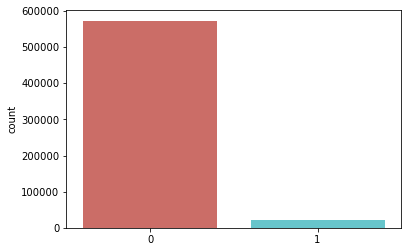

In [4]:
import seaborn as sns
sns.countplot(x=target, palette='hls')
plt.show()

In [5]:
count_1 = len(target[target==1])
pct_of_1 = count_1/len(target)
print("процент первого исхода", pct_of_1*100, "%")

процент первого исхода 3.6447517859182947 %


Почему она такая... ну видимо потому что мало людей обращается в страховое агенство, ну
или просто такие данные в датасете.

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [5]:
data_one_hot = data

for column in ind_list:
    one_hot = pd.get_dummies(data_one_hot[column])
    data_one_hot = data_one_hot.drop([column], axis=1)
    data_one_hot = pd.concat([data_one_hot, one_hot], axis=1)


В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data_one_hot, target, test_size=0.2, random_state=124)

lrc = LogisticRegression(max_iter=500)
start = time.time()
lrc.fit(X_train, y_train)
y_pred = lrc.predict_proba(X_test)[: , 1]
print("Time:", time.time() - start)
print("ROC AUC:", roc_auc_score(y_test, y_pred))

d:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Time: 133.55236339569092
ROC AUC: 0.6381357715866682


Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

ROC-AUC такой же как и раньше, я думаю это связано с тем, что положительных данных всего 3%.

Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

Text(0.5, 1.0, 'Precision-Recall curve: AP=0.06')

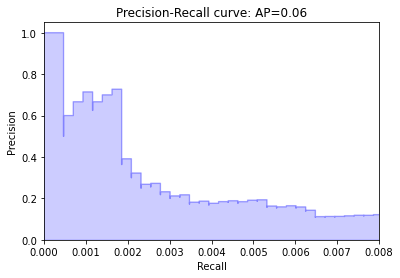

In [24]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
color='b')

average_precision = average_precision_score(y_test, y_pred)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 0.008])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

Как и ожидалось, PR низкий, это связано с тем, что этот показатель показывает насколько наша модель
предсказывает положительную переменную, а она у нас в выборке занимает всего 3%, а значит предсказать ее проблематично.

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 11.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

In [25]:
lrc = LogisticRegression(max_iter=500)
start = time.time()
lrc.fit(X_train, y_train)
y_pred = lrc.predict_proba(X_test)
print("Time:", time.time() - start)


d:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Time: 140.24983191490173


In [42]:
a = np.array(y_pred[:,1] > 0.47).astype(int)
print(precision_score(y_test,a))
print(recall_score(y_test,a))
print(np.count_nonzero(a))

1.0
0.0004628558204119417
2


Чтобы получить 95% мы отказываем всего двум клиентам.

Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился.

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной.

__Задание 12.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный.

__(1 балл)__

In [57]:
a = np.array(y_pred[:,1] > 0.1).astype(int)
confusion_matrix_ = confusion_matrix(y_test, a)
balance = -5000*confusion_matrix_[0,1] + 100000*confusion_matrix_[1,1]
print("Доход: ", balance)

Доход:  8175000


In [56]:
confusion_matrix_

array([[     0, 114722],
       [     0,   4321]], dtype=int64)

А на каком значение порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

Тут я считаю, что TP - мы им отказываем и потенциально не потеряли на этом 100000. А FP - мы им отказываем и теряем потенциальные 5000

In [58]:
balance = []
for i in range(0,30):
    a = np.array(y_pred[:,1] > i / 100).astype(int)
    confusion_matrix_ = confusion_matrix(y_test, a)
    balance_ = -5000*confusion_matrix_[0,1] + 100000*confusion_matrix_[1,1]
    balance.append(balance_)

Text(0.5, 1.0, 'Зависимость баланса от порога')

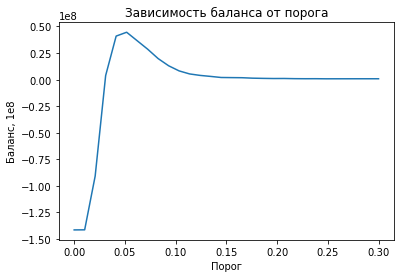

In [62]:
plt.plot(np.linspace(0,0.3,30), balance)
plt.xlabel('Порог')
plt.ylabel('Баланс, 1е8')
plt.title('Зависимость баланса от порога')

In [63]:
best_step = np.argmax(balance) / 100

In [64]:
a = np.array(y_pred[:,1] > best_step).astype(int)
confusion_matrix_ = confusion_matrix(y_test, a)
balance = -5000*confusion_matrix_[0,1] + 100000*confusion_matrix_[1,1]
print("Доход: ", balance)

Доход:  44565000


In [65]:
confusion_matrix_

array([[96015, 18707],
       [ 2940,  1381]], dtype=int64)

Мы бы отказали - 20088 клиентам.

## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 0.5 БАЛЛА НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 13.__ Работа с vowpal wabbit.

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте.
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__

array([0.50025189])